In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings(action='ignore')

# Step 1. Read data and understand data patterns

In [2]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#df.describe(include='object').T # categorical
#df.describe().T # numerical
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
null_count = df.isnull().sum()
null_percentage = null_count / (df.shape[0]+0.0001) * 100
print('count and percentages of null values for each column:\n', pd.concat([null_count, null_percentage], axis=1))

count and percentages of null values for each column:
                   0          1
InvoiceNo         0   0.000000
StockCode         0   0.000000
Description    1454   0.268311
Quantity          0   0.000000
InvoiceDate       0   0.000000
UnitPrice         0   0.000000
CustomerID   135080  24.926694
Country           0   0.000000


### plot missing data examples

In [7]:
df[df["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [8]:
df[df["CustomerID"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


# Step 2. Check data pattern/anomalies

## 1) InvoiceNo
- not always numercial values. can be e.g.,C536379
- always between 6-7 chars

In [9]:
# not always numerical values
# is_numeric = df['InvoiceNo'].str.isdigit().all() -> false

# examples when they are not digit
is_numeric = df['InvoiceNo'].str.isdigit()
df[~df["InvoiceNo"].str.isdigit()]

# InvoiceNo string length always between 6 ~ 7
InvoiceNo_length = [df['InvoiceNo'].str.len().min(),df['InvoiceNo'].str.len().max()]

## 1) StockCode
- product id
- not always digital values, e.g., 85123A
- string length between 1 ~ 12. 89% of them contains 5 chars
- filter out stockcode whose length <= 4 chars. We assume those products are not really products, but rather e.g., shipment cost

In [10]:
# not always numerical values
is_numeric = df['StockCode'].str.isdigit().all() #-> false

# examples when they are not digit
is_numeric = df['StockCode'].str.isdigit()
df[~df["StockCode"].str.isdigit()]

# InvoiceNo string length between 1 ~ 12
StockCode_length = [df['StockCode'].str.len().min(),df['StockCode'].str.len().max()]

# check frequencies of StockCode with str length 1 ~ 12
result = df.groupby(df['StockCode'].str.len())['StockCode'].count()#['StockCode'].str.len().count_values()

result / df.shape[0] * 100

# check how each StockCode looks like with str length 1 ~ 12
df[df["StockCode"].str.len() == 4]["StockCode"]# D, M,C2, DOT, POST...doest represent product

# filter out stock code whose length <= 4
df = df[df["StockCode"].str.len() > 4]

## 3) Description (omit this column as it will not be used for data analysis)
This column serves as reference information for the analyst

## 4) Quantity
- int64 numerical type
- check histogram. there exists a small amount of negative values, representing returned products
- Return order starts with "C" in InvoiceNo
- there are 2 big purchase and returns (>|20000|). returns and purchase are the same products. These four recordings should be filtered out, because the returns happened right after purchase, indicating that they are accidental orders
- add "Return" = {"Yes", "No"} column to identify if a transaction is buy or return

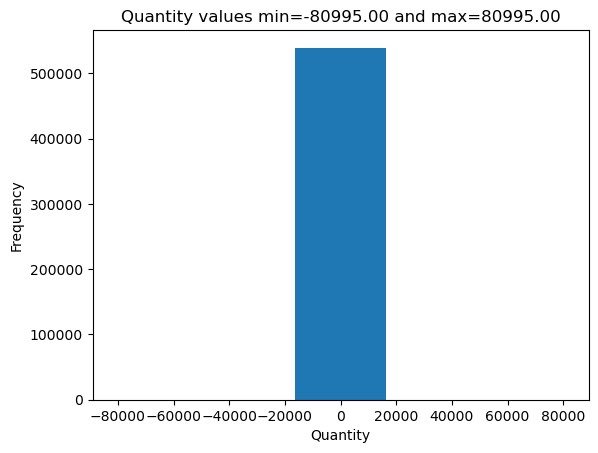

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [11]:
plt.hist(df['Quantity'],bins=5)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity values min={:.2f} and max={:.2f}'.format(df['Quantity'].min(),df['Quantity'].max()))
#plt.ylim(0, 5000)
plt.show()

# check
df[(df['Quantity']<-20000) | (df['Quantity']>20000)]

In [12]:
df = df[df['Quantity'].abs() < 20000]
df[(df['Quantity']<20000) | (df['Quantity']>-20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### add a column "Return" ("Yes" or "No"): if a transaction is buy or return

In [13]:
df['Return'] = df['Quantity'].apply(lambda x: 'Yes' if x < 0 else 'No')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,No
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,No
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,No
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,No


## 5) InvoiceDate
- contains only date values
- compute new time measures for the convenience of analysis later

In [14]:
# check if they are all dates 
try:
    pd.to_datetime(df['InvoiceDate'])
    print(f"The column InvoiceDate contains only valid date values.")
except ValueError:
    print(f"The column InvoiceDate does not contain only valid date values.")

The column InvoiceDate contains only valid date values.


In [15]:
# convert to date type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# compute useful time measures
df["InvoiceYear"] = df['InvoiceDate'].dt.year
df["InvoiceMonth"] = df['InvoiceDate'].dt.month
df["InvoiceDay"] = df['InvoiceDate'].dt.date
df["InvoiceDayofWeek"] = df['InvoiceDate'].dt.dayofweek + 1 # Monday is the first day
df["InvoiceDayName"] = df["InvoiceDate"].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.strftime('%H')
df['InvoiceDaytoLatest'] = (df['InvoiceDay'].max() - df['InvoiceDay']).dt.days
df['InvoiceDaytoEarliest'] = (df['InvoiceDay']-df['InvoiceDay'].min()).dt.days + 1

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayofWeek,InvoiceDayName,Hour,InvoiceDaytoLatest,InvoiceDaytoEarliest
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,08,373,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,08,373,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,08,373,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,08,373,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,08,373,1


## 6) UnitPrice
- 2500 purchase with UnitPrice = 0, small proportion of total data. So delete them

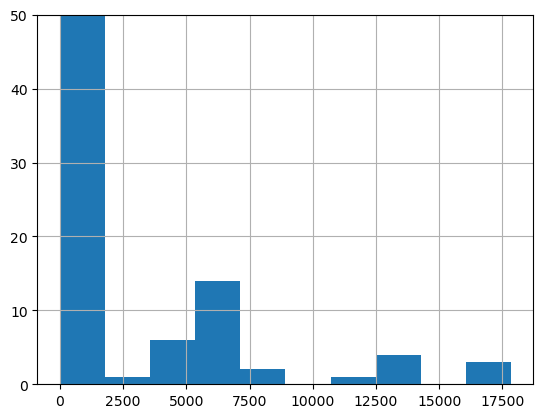

In [16]:
df["UnitPrice"].hist() 
plt.ylim(0, 50)
plt.show()

(df["UnitPrice"]==0).sum() # = 2500

df = df[df["UnitPrice"]>0]

## 7) Customer ID
- data type is float
- 25% customerID is missing. These may be unregistered customers and are valuable information

In [17]:
customerid_null_percentage = df['CustomerID'].isnull().sum() / df['CustomerID'].shape[0]

# show examples when CustomerID is null
df_CustomerID_isnull = df[df['CustomerID'].isnull()]
df_CustomerID_isnull.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayofWeek,InvoiceDayName,Hour,InvoiceDaytoLatest,InvoiceDaytoEarliest
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,No,2010,12,2010-12-01,3,Wednesday,14,373,1


## 8) Country
- study quantity, transactionvalue (quantity*unitprice) by country.
- UK is largest target country

In [18]:
# count Quantity by country
df.groupby('Country')["Quantity"].sum().sort_values(ascending=False)

Country
United Kingdom          4396246
Netherlands              199934
EIRE                     142262
Germany                  116341
France                   109690
Australia                 83345
Sweden                    35599
Switzerland               30227
Spain                     26607
Japan                     25221
Belgium                   22880
Norway                    19188
Portugal                  16082
Finland                   10575
Channel Islands            9476
Denmark                    8147
Italy                      7957
Cyprus                     6316
Singapore                  5234
Austria                    4790
Hong Kong                  4767
Israel                     4353
Poland                     3644
Unspecified                3300
Canada                     2762
Iceland                    2458
Greece                     1550
USA                        1034
United Arab Emirates        981
Malta                       934
Lithuania                   652


#### count Quantity * Unitprice by country, add this new column "TransactionValue" to df

In [19]:
df['TransactionValue'] = df['Quantity'] * df['UnitPrice']

In [20]:
# count TransactionValue by country
df.groupby('Country')["TransactionValue"].sum().sort_values(ascending=False)

Country
United Kingdom          8073707.951
Netherlands              283479.540
EIRE                     259663.460
Germany                  200808.400
France                   182163.390
Australia                136990.000
Switzerland               52505.350
Spain                     51765.200
Belgium                   36662.960
Japan                     35419.790
Sweden                    35176.910
Norway                    32292.960
Portugal                  26871.520
Channel Islands           19936.290
Finland                   18303.540
Denmark                   18042.140
Italy                     15276.340
Cyprus                    12931.290
Hong Kong                  9942.040
Singapore                  9120.390
Austria                    8698.320
Israel                     7907.820
Poland                     6853.140
Unspecified                4749.790
Greece                     4425.520
Iceland                    4310.000
Canada                     3115.440
Malta               

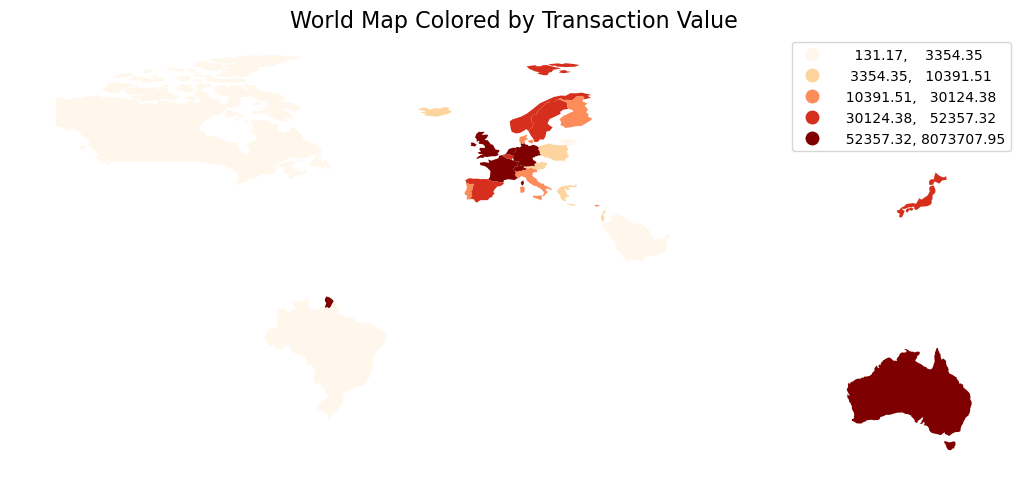

In [21]:
TransactionValue_by_Country = df.groupby('Country')["TransactionValue"].sum().reset_index()
#TransactionValue_by_Country = df.groupby('Country')["TransactionValue"].agg(lambda x: np.log(x.sum())).reset_index()

# Merge country_totals with the world GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(TransactionValue_by_Country, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(13, 9))
world.plot(column='TransactionValue', 
           cmap='OrRd', 
           scheme = 'quantiles',
           legend=True, 
           ax=ax)

plt.title('World Map Colored by Transaction Value', fontsize = 16)
plt.axis('off')
plt.show()

## Step 3. Sales data explore
- daily sales slowly increase over time
- TransactionValues(=OrderQuantity*UnitPrice) and Order Quantites reach the maximum value on November, right before holiday seasons.
- ReturnRate ranges between 1% and 5%. Largest return rate happens in April
- As this dataset contains only 1 year recordings, it's hard to conclude a generalized monthly pattern


In [22]:
# quick check the current df
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536560 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             536560 non-null  object        
 1   StockCode             536560 non-null  object        
 2   Description           536560 non-null  object        
 3   Quantity              536560 non-null  int64         
 4   InvoiceDate           536560 non-null  datetime64[ns]
 5   UnitPrice             536560 non-null  float64       
 6   CustomerID            404884 non-null  float64       
 7   Country               536560 non-null  object        
 8   Return                536560 non-null  object        
 9   InvoiceYear           536560 non-null  int64         
 10  InvoiceMonth          536560 non-null  int64         
 11  InvoiceDay            536560 non-null  object        
 12  InvoiceDayofWeek      536560 non-null  int64         
 13 

Text(0.5, 1.0, 'Daily TransactionValue and OrderQuantity over time. The correlation coefficient is 0.91')

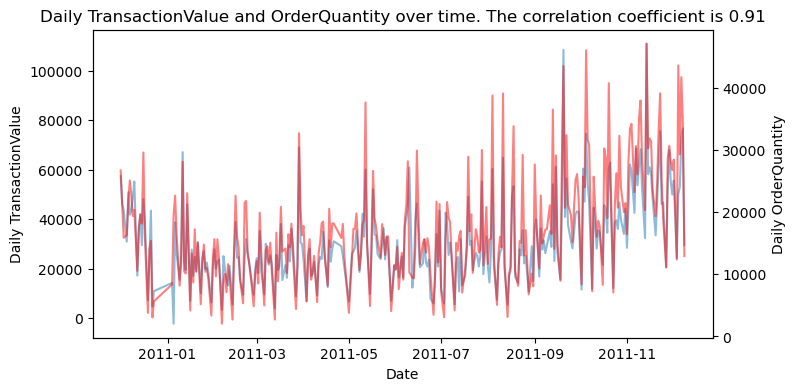

In [23]:
# transactionvalue and quantity over date
TotalSalesQuantity = df.groupby('InvoiceDay').agg({'TransactionValue': ['sum'], 'Quantity':['sum']}).reset_index()
coef = np.corrcoef(TotalSalesQuantity['TransactionValue'].to_numpy().flatten(),TotalSalesQuantity['Quantity'].to_numpy().flatten())[0,1]

TotalSalesQuantity

fig, ax1 = plt.subplots(1,1, figsize=(8, 4))

ax1.plot(TotalSalesQuantity['InvoiceDay'], TotalSalesQuantity['TransactionValue'],alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily TransactionValue')

ax2 = ax1.twinx()
ax2.plot(TotalSalesQuantity['InvoiceDay'], TotalSalesQuantity['Quantity'],'r',alpha=0.5)
ax2.set_ylabel('Daily OrderQuantity')
plt.title('Daily TransactionValue and OrderQuantity over time. The correlation coefficient is {:.2f}'.format(coef))

,InvoiceDay,ReturnQuantity,TotalQuantity,ReturnRate
0,2010-12-01,182.0,26909,0.676354
1,2010-12-02,10287.0,31328,32.836440
2,2010-12-03,291.0,16177,1.798850
3,2010-12-05,55.0,16371,0.335960
4,2010-12-06,298.0,21768,1.368982
...,...,...,...,...
300,2011-12-05,124.0,43755,0.283396
301,2011-12-06,1106.0,30437,3.633735
302,2011-12-07,106.0,41858,0.253237
303,2011-12-08,639.0,35066,1.822278


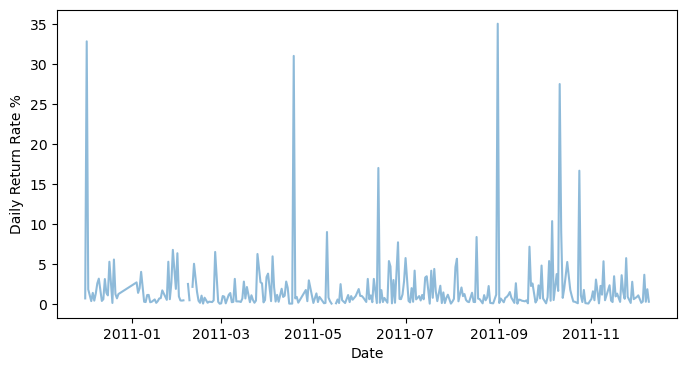

In [24]:
# return rate over date
ReturnQuantity = df[df['Return']=='Yes'].groupby('InvoiceDay')['Quantity'].agg(ReturnQuantity = lambda x: np.abs(x).sum())#{'Quantity'}: ['sum'])# 
TotalQuantity = df[df['Return']=='No'].groupby('InvoiceDay')['Quantity'].agg(TotalQuantity = lambda x: np.abs(x).sum()) # .size() return the number of records

df_Return = pd.DataFrame({'InvoiceDay': df['InvoiceDay'].unique()})
df_Return = df_Return.merge(ReturnQuantity, on='InvoiceDay', how='left')
df_Return = df_Return.merge(TotalQuantity, on='InvoiceDay', how='left')
df_Return['ReturnRate'] = df_Return['ReturnQuantity'] / df_Return['TotalQuantity'] * 100


# plot return rate

fig, ax1 = plt.subplots(1,1, figsize=(8, 4))

ax1.plot(df_Return['InvoiceDay'], df_Return['ReturnRate'],alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return Rate %')

df_Return

Text(0.5, 1.0, 'Monthly TransactionValue and OrderQuantity. The correlation coefficient is 0.99')

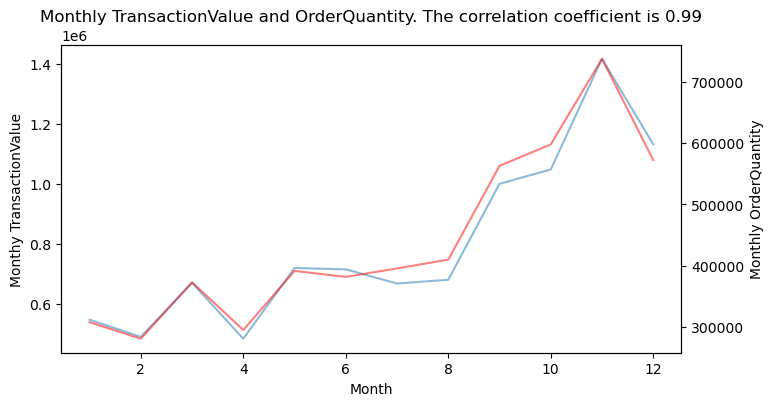

In [25]:
# transactionvalue and quantity over Month
TotalSalesQuantity = df.groupby('InvoiceMonth').agg({'TransactionValue': ['sum'], 'Quantity':['sum']}).reset_index()
coef = np.corrcoef(TotalSalesQuantity['TransactionValue'].to_numpy().flatten(),TotalSalesQuantity['Quantity'].to_numpy().flatten())[0,1]


fig, ax1 = plt.subplots(1,1, figsize=(8, 4))

ax1.plot(TotalSalesQuantity['InvoiceMonth'], TotalSalesQuantity['TransactionValue'],alpha=0.5)
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthy TransactionValue')

ax2 = ax1.twinx()
ax2.plot(TotalSalesQuantity['InvoiceMonth'], TotalSalesQuantity['Quantity'],'r',alpha=0.5)
ax2.set_ylabel('Monthly OrderQuantity')
plt.title('Monthly TransactionValue and OrderQuantity. The correlation coefficient is {:.2f}'.format(coef))

Text(0, 0.5, 'Monthly Return Rate %')

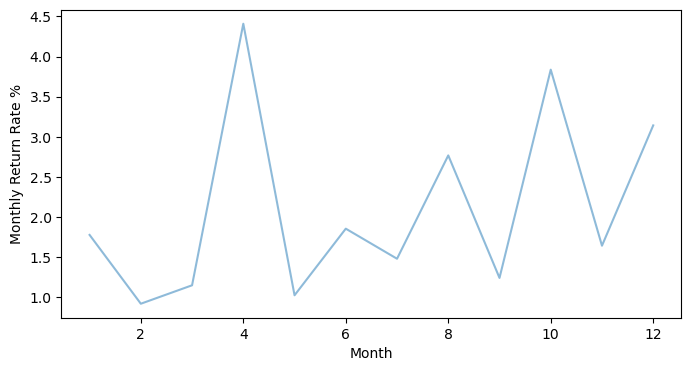

In [26]:
# return rate over month
ReturnQuantity = df[df['Return']=='Yes'].groupby('InvoiceMonth')['Quantity'].agg(ReturnQuantity = lambda x: np.abs(x).sum())#{'Quantity'}: ['sum'])# 
TotalQuantity = df[df['Return']=='No'].groupby('InvoiceMonth')['Quantity'].agg(TotalQuantity = lambda x: np.abs(x).sum()) # .size() return the number of records

df_Return = pd.DataFrame({'InvoiceMonth': df['InvoiceMonth'].unique()})
df_Return = df_Return.merge(ReturnQuantity, on='InvoiceMonth', how='left')
df_Return = df_Return.merge(TotalQuantity, on='InvoiceMonth', how='left')
df_Return['ReturnRate'] = df_Return['ReturnQuantity'] / df_Return['TotalQuantity'] * 100
df_Return = df_Return.sort_values(by='InvoiceMonth')
df_Return

# plot return rate
fig, ax1 = plt.subplots(1,1, figsize=(8, 4))
ax1.plot(df_Return['InvoiceMonth'], df_Return['ReturnRate'],alpha=0.5)
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthly Return Rate %')

### How many products sold per day?

Text(0.5, 1.0, 'Sales quantity over date')

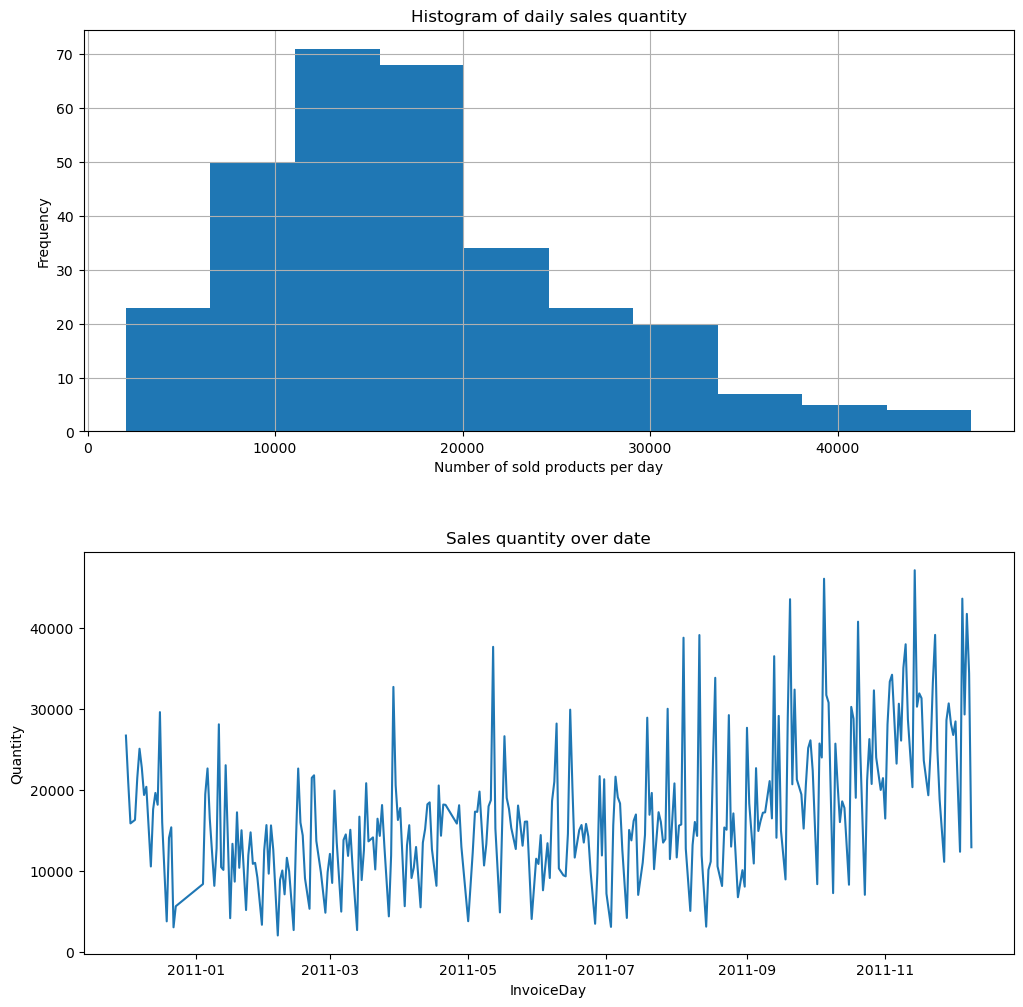

In [27]:
# transactionvalue and quantity over InvoiceDay
TotalSalesQuantity = df.groupby('InvoiceDay').agg({'TransactionValue': ['sum'], 'Quantity':['sum']}).reset_index()


fig, ax = plt.subplots(2, 1, figsize=(12, 12))

TotalSalesQuantity['Quantity'].hist(ax=ax[0])
ax[0].set_xlabel('Number of sold products per day')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of daily sales quantity')

ax[1].plot(TotalSalesQuantity['InvoiceDay'], TotalSalesQuantity['Quantity'])
ax[1].set_xlabel('InvoiceDay')
ax[1].set_ylabel('Quantity')
ax[1].set_title('Sales quantity over date')

### What are the top 10 products (according to Purchase Quantity)?

In [28]:
PopularProduct = df.groupby(['StockCode']).agg({'TransactionValue': ['sum'], 'Quantity':['sum']}).reset_index()

sorted_df = PopularProduct.sort_values(by=('Quantity', 'sum'),ascending=False)
sorted_df.head(10)

,StockCode,TransactionValue,Quantity
,,sum,sum
1112,22197,50987.47,56450
2915,84077,13587.93,53847
3400,85099B,92356.03,47359
3201,84879,58959.73,36381
440,21212,21059.72,36039
3420,85123A,97894.50,35082
1945,23084,66756.59,30680
1377,22492,16810.42,26437
1495,22616,7972.76,26111


### How many times a product was sold?

In [29]:
df.groupby('StockCode')["Quantity"].count().sort_values(ascending=False)

StockCode
85123A    2307
22423     2198
85099B    2156
47566     1726
20725     1639
          ... 
84743C       1
90167        1
20678        1
90048        1
20957        1
Name: Quantity, Length: 3927, dtype: int64

### analyze the most sold product 22197

array([[ 1.        , -0.07774803],
       [-0.07774803,  1.        ]])

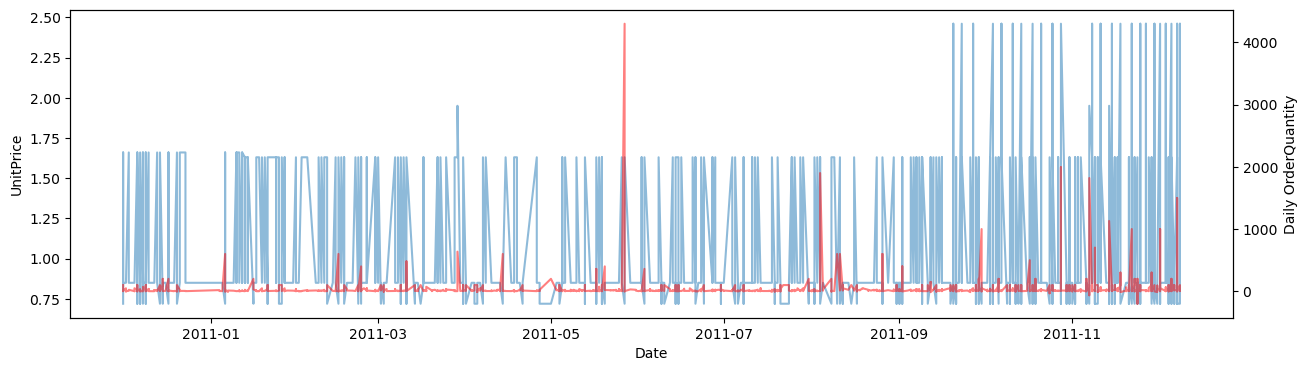

In [30]:
df_Product_22197 = df[df['StockCode']=='22197']

fig, ax1 = plt.subplots(1,1, figsize=(15, 4))

ax1.plot(df_Product_22197['InvoiceDay'],df_Product_22197['UnitPrice'], alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('UnitPrice')

# compute Quantity
ax2 = ax1.twinx()
ax2.plot(df_Product_22197['InvoiceDay'], df_Product_22197['Quantity'],'r',alpha=0.5)
ax2.set_ylabel('Daily OrderQuantity')

np.corrcoef(df_Product_22197['UnitPrice'],df_Product_22197['Quantity'])

## Step 4. Sales forecast

### Feature engineering for sales forecast (Sales Quantity over InvoiceDay)

Text(0, 0.5, 'Frequency')

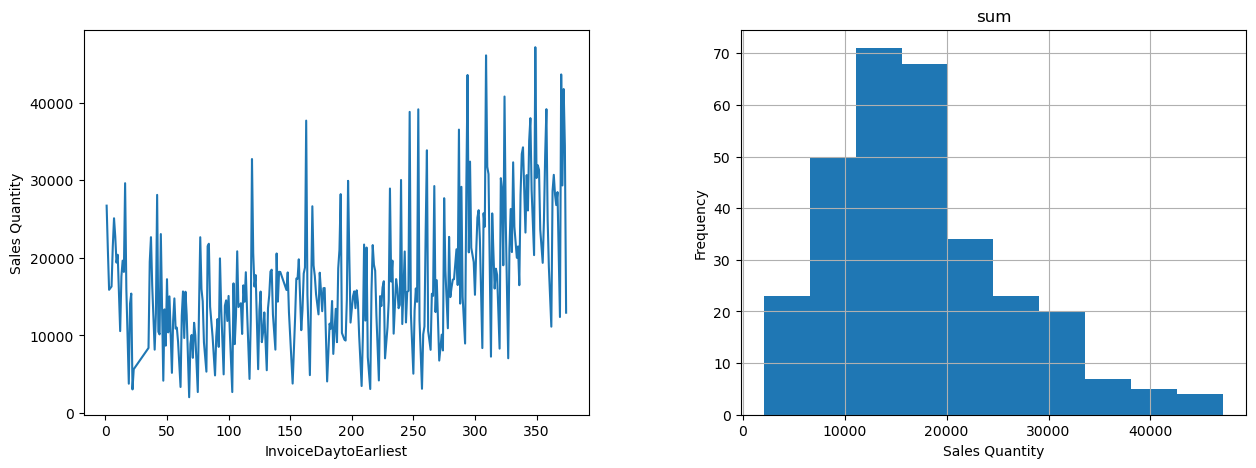

In [37]:
sales_feature = df.groupby(['InvoiceDaytoEarliest','InvoiceMonth','InvoiceDayofWeek']).agg({'TransactionValue': ['sum'], 'Quantity':['sum']}).reset_index()
sales_feature.head()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(sales_feature['InvoiceDaytoEarliest'],sales_feature['Quantity'])
ax[0].set_xlabel('InvoiceDaytoEarliest')
ax[0].set_ylabel('Sales Quantity')

sales_feature['Quantity'].hist(ax=ax[1])
ax[1].set_xlabel('Sales Quantity')
ax[1].set_ylabel('Frequency')

### Train/Validation/Test Split